In [1]:
# Mount the Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Change the directory yo YOLO_
%cd "/content/gdrive/MyDrive/YOLO"

Mounted at /content/gdrive
/content/gdrive/MyDrive/YOLO


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [2]:
%cd darknet

/content/gdrive/MyDrive/YOLO/darknet


In [3]:

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/OPENMP=0/OPENMP=1/' Makefile

In [4]:
# Comment in future runs
# Compile the darknet
!make

chmod +x *.sh


In [5]:
# Change the permission of the darknet file
!chmod a+x ./darknet

In [6]:
!ls -l

total 3276705
drwx------ 2 root root       4096 May 20 12:56 3rdparty
drwx------ 2 root root       4096 May 20 13:15 backup
-rw------- 1 root root     701090 May 20 16:22 bad.list
drwx------ 2 root root       4096 May 20 12:56 build
-rw------- 1 root root      44955 May 20 11:50 build.ps1
drwx------ 2 root root       4096 May 20 12:56 cfg
-rw------- 1 root root      87240 May 20 16:21 chart.png
-rw------- 1 root root      87240 May 20 16:21 chart_yolo-voc.png
drwx------ 2 root root       4096 May 20 12:56 cmake
-rw------- 1 root root      29835 May 20 11:50 CMakeLists.txt
-rw------- 1 root root 2603966464 May 20 16:22 core
-rwx------ 1 root root    6164264 May 20 13:15 darknet
-rw------- 1 root root       1493 May 20 11:50 DarknetConfig.cmake.in
-rw------- 1 root root       9559 May 20 11:50 darknet_images.py
-rw------- 1 root root      11106 May 20 11:50 darknet.py
-rw------- 1 root root       8000 May 20 11:50 darknet_video.py
drwx------ 2 root root       4096 May 20 12:56 data
-rw--

In [7]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [8]:
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights


--2024-05-25 14:17:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.3’

yolov3.weights.3    100%[===================>] 236.52M  35.8MB/s    in 7.3s    

2024-05-25 14:20:30 (32.5 MB/s) - ‘yolov3.weights.3’ saved [248007048/248007048]



 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595

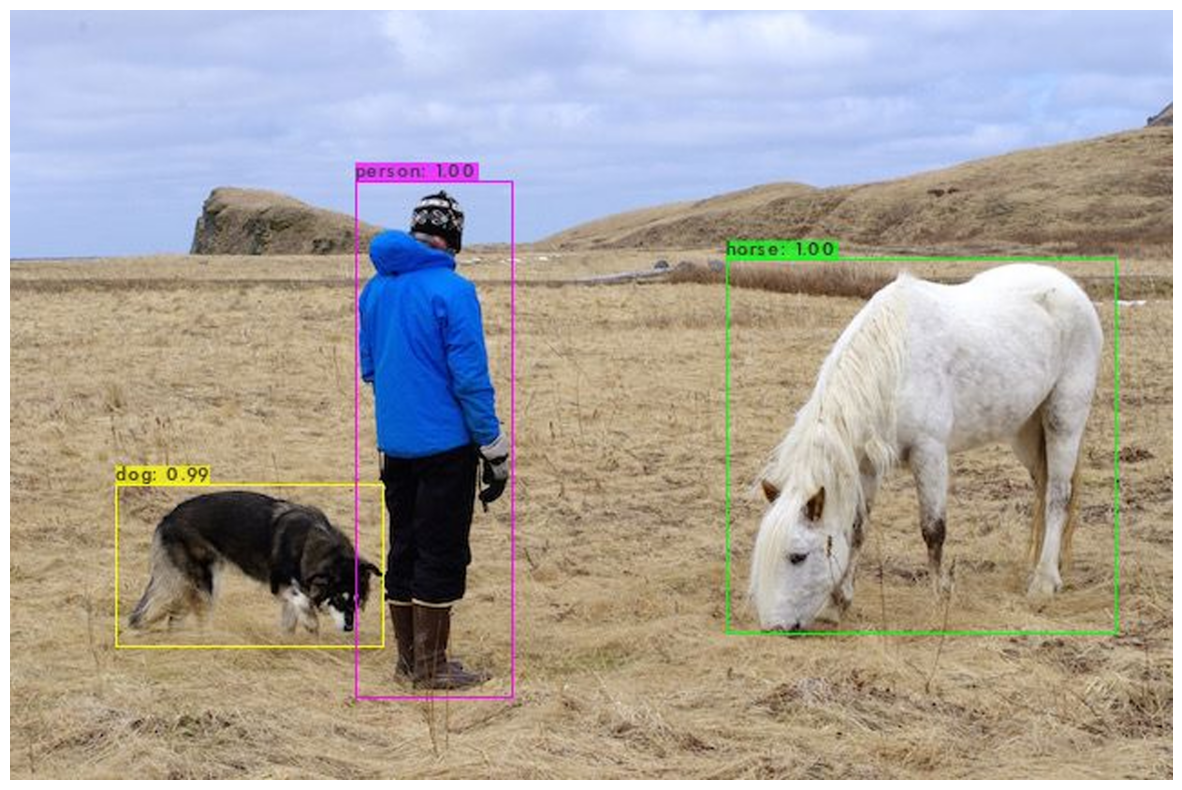

In [9]:
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect /content/gdrive/My\ Drive/YOLO/darknet/cfg/yolov3.cfg yolov3.weights /content/gdrive/My\ Drive/YOLO/darknet/data/person.jpg -dont-show

imShow('predictions.jpg')

In [10]:
!./darknet detector train obj.data cfg/yolo-voc.2.0.cfg weights/darknet19_448.conv.23 -dont_show -map

Streaming output truncated to the last 5000 lines.
 mean average precision (mAP@0.50) = 0.576727, or 57.67 % 
Total Detection Time: 4 Seconds

Set -points flag:
 `-points 101` for MS COCO 
 `-points 11` for PascalVOC 2007 (uncomment `difficult` in voc.data) 
 `-points 0` (AUC) for ImageNet, PascalVOC 2010-2012, your custom dataset

 mean_average_precision (mAP@0.50) = 0.576727 
Saving weights to /content/gdrive/MyDrive/YOLO/darknet/backup/yolo-voc_last.weights
Loaded: 0.000117 seconds
Region Avg IOU: 0.571586, Class: 0.880264, Obj: 0.559982, No Obj: 0.005780, Avg Recall: 0.500000,  count: 10
Region Avg IOU: 0.243381, Class: 0.399651, Obj: 0.280346, No Obj: 0.003491, Avg Recall: 0.200000,  count: 5
Region Avg IOU: 0.348479, Class: 0.659186, Obj: 0.405416, No Obj: 0.004235, Avg Recall: 0.200000,  count: 10
Region Avg IOU: 0.478441, Class: 0.790765, Obj: 0.410839, No Obj: 0.004819, Avg Recall: 0.400000,  count: 10
Region Avg IOU: 0.373456, Class: 0.687518, Obj: 0.380284, No Obj: 0.004581,

In [34]:
!./darknet detector test obj.data cfg/yolo-voc.2.0.cfg backup/yolo-voc_2000.weights /content/gdrive/MyDrive/YOLO/darknet/img/IMG-20240423-WA0002.jpg -dont_show


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv    128       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x 128 1.196 BF
   1 max                2x 2/ 2    416 x 416 x 128 ->  208 x 208 x 128 0.022 BF
   2 conv     64       1 x 1/ 1    208 x 208 x 128 ->  208 x 208 x  64 0.709 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128

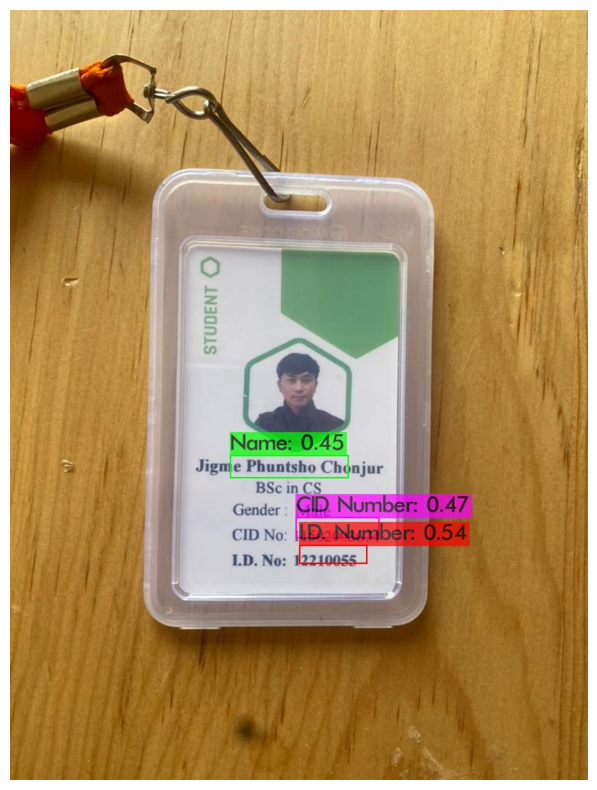

In [35]:
imShow('predictions.jpg')